In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [43]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [44]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [47]:
x_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [48]:
mean_age=x_train['Age'].mean()
medium_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
medium_fare=x_train['Fare'].median()

In [49]:
x_train['Age_medium']=x_train['Age'].fillna(medium_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_medium']=x_train['Fare'].fillna(medium_fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)

In [50]:
x_train.sample(5)

,Age,Fare,Family,Age_medium,Age_mean,Fare_medium,Fare_mean
466,NaN,NaN,0,28.0,29.498846,14.4000,32.517788
131,20.0,7.0500,0,20.0,20.000000,7.0500,7.050000
100,28.0,7.8958,0,28.0,28.000000,7.8958,7.895800
114,17.0,14.4583,0,17.0,17.000000,14.4583,14.458300
247,24.0,14.5000,2,24.0,24.000000,14.5000,14.500000


In [51]:
print('orignal Age variable variance :',x_train['Age'].var())
print('Age variance after meadin imputation :',x_train['Age_medium'].var())
print('Age variance after mean imputation :',x_train['Age_mean'].var())

print('orignal Fare variable variance :',x_train['Fare'].var())
print('Fare variance after meadin imputation :',x_train['Fare_medium'].var())
print('Fare variance after mean imputation :',x_train['Fare_mean'].var())


orignal Age variable variance : 210.2517072477438
Age variance after meadin imputation : 169.20731007048096
Age variance after mean imputation : 168.8519336687225
orignal Fare variable variance : 2761.031434948639
Fare variance after meadin imputation : 2637.01248167777
Fare variance after mean imputation : 2621.2323749512393


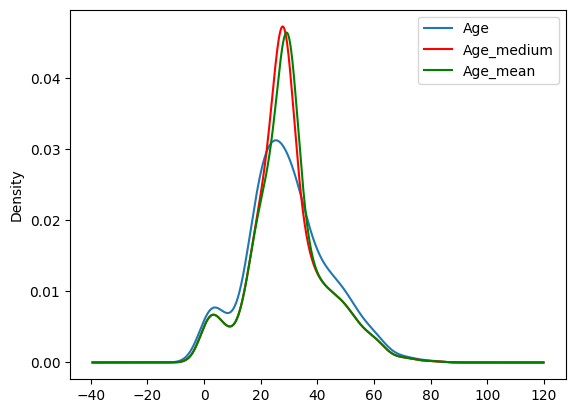

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_medium'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

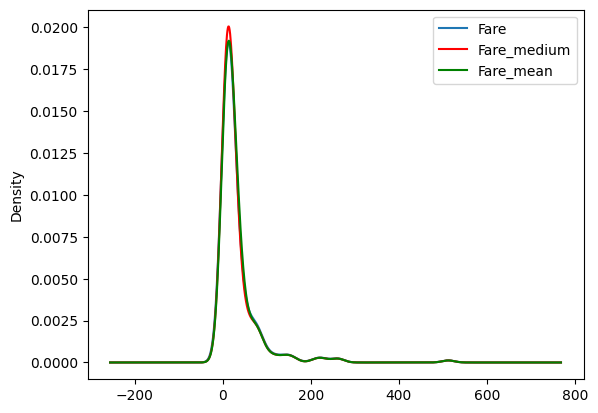

In [53]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_medium'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


In [54]:
x_train.cov()

,Age,Fare,Family,Age_medium,Age_mean,Fare_medium,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_medium,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_medium,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [55]:
x_train.corr()

,Age,Fare,Family,Age_medium,Age_mean,Fare_medium,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_medium,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_medium,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

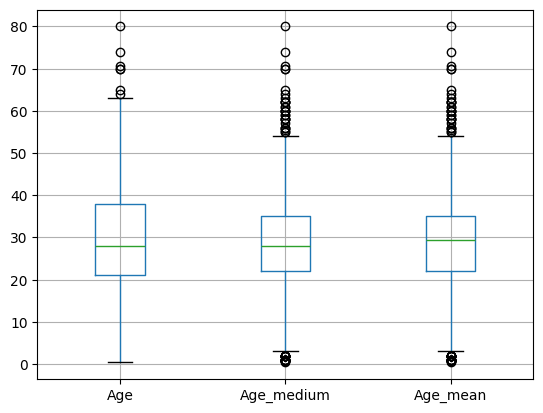

In [56]:
x_train[['Age','Age_medium','Age_mean']].boxplot()

<Axes: >

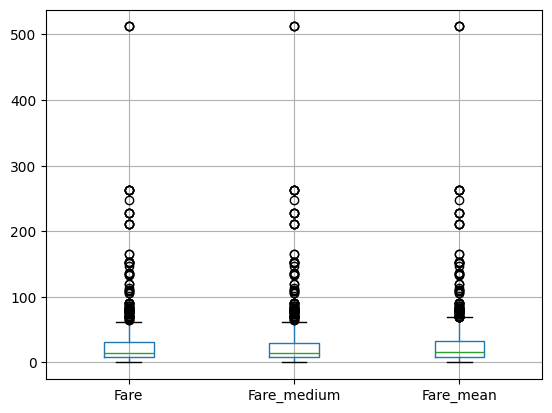

In [57]:
x_train[['Fare','Fare_medium','Fare_mean']].boxplot()

 **using sklearn**

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [60]:
trf=ColumnTransformer([
    ('mean_age',imputer1,['Age']),
    ('mean_fare',imputer2,['Fare'])
],remainder='passthrough')

In [61]:
trf.fit_transform(x_train)

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])

In [64]:
trf.named_transformers_['mean_age'].statistics_

array([28.])